In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.python.ops.gen_batch_ops import Batch
from tensorflow.keras.regularizers import l1_l2

2024-10-16 18:37:44.362393: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 18:37:44.383351: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-16 18:37:44.383371: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-16 18:37:44.383385: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-16 18:37:44.387388: I tensorflow/core/platform/cpu_feature_g

In [2]:
from sklearn.decomposition import PCA

In [3]:
df_combined = pd.read_csv(r'/home/sanven0212/PycharmProjects/MultiOmicsFYP/Combined_Omics_Mutated_Genes_Dataset.csv')
df_combined

,Unnamed: 0,GE_FOXA1,GE_CTNNB1,GE_NKX3-1,GE_ATM,GE_SPOP,GE_ZMYM3,GE_BRAF,CNA_FOXA1,CNA_CTNNB1,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0,0.602396,0.875180,0.652366,0.725424,0.485713,0.650304,0.398619,0.351251,0.540445,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
1,1,0.555186,0.384184,0.706125,0.374939,0.384733,0.527966,0.231899,0.373873,0.699505,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
2,2,0.617020,0.792797,0.481580,0.664329,0.501783,0.696835,0.373817,0.360982,0.523447,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
3,3,0.478407,0.786356,0.568205,0.838920,0.610479,0.889998,0.498159,0.356812,0.516999,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
4,4,0.377998,0.824718,0.504132,0.611074,0.470017,0.428205,0.292625,0.356812,0.519343,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,285,0.100142,0.781156,0.000000,1.000000,0.346003,0.687155,0.230994,0.356812,0.519343,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
286,286,0.624984,0.860459,0.753073,0.688023,0.427905,0.716040,0.389102,0.356812,0.517585,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
287,287,0.642609,0.878522,0.668838,0.722636,0.461165,0.703648,0.466096,0.332607,0.467498,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
288,288,0.535638,0.851672,0.606659,0.667384,0.350445,0.699619,0.382227,0.357739,0.519930,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0


In [4]:
df_combined.drop('Unnamed: 0', axis = 1, inplace = True)
df_combined

,GE_FOXA1,GE_CTNNB1,GE_NKX3-1,GE_ATM,GE_SPOP,GE_ZMYM3,GE_BRAF,CNA_FOXA1,CNA_CTNNB1,CNA_PTEN,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0.602396,0.875180,0.652366,0.725424,0.485713,0.650304,0.398619,0.351251,0.540445,0.683951,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
1,0.555186,0.384184,0.706125,0.374939,0.384733,0.527966,0.231899,0.373873,0.699505,0.410377,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
2,0.617020,0.792797,0.481580,0.664329,0.501783,0.696835,0.373817,0.360982,0.523447,0.553580,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
3,0.478407,0.786356,0.568205,0.838920,0.610479,0.889998,0.498159,0.356812,0.516999,0.644938,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
4,0.377998,0.824718,0.504132,0.611074,0.470017,0.428205,0.292625,0.356812,0.519343,0.635062,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.100142,0.781156,0.000000,1.000000,0.346003,0.687155,0.230994,0.356812,0.519343,0.637037,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
286,0.624984,0.860459,0.753073,0.688023,0.427905,0.716040,0.389102,0.356812,0.517585,0.639506,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
287,0.642609,0.878522,0.668838,0.722636,0.461165,0.703648,0.466096,0.332607,0.467498,0.612923,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
288,0.535638,0.851672,0.606659,0.667384,0.350445,0.699619,0.382227,0.357739,0.519930,0.644444,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0


**Checking the correlation between I/P features and Target**

In [5]:
print(f"Correlation of input features and target: {df_combined.corr()['Gleason_Score'].sort_values(ascending = False)}")

Correlation of input features and target: Gleason_Score             1.000000
CNA_BRAF                  0.217880
DM_SPOP                   0.200400
CNA_CTNNB1                0.184626
CNA_FOXA1                 0.096956
CNA_ZMYM3                 0.095829
GE_BRAF                   0.071645
DM_CTNNB1                 0.063715
GE_FOXA1                  0.058571
CNA_MED12                 0.037322
DM_PTEN                   0.033545
CNA_TP53                  0.021447
DM_FOXA1                  0.004920
DM_BRAF                   0.004415
GE_NKX3-1                -0.002475
DM_NKX3-1                -0.035855
CNA_PTEN                 -0.044222
GE_ATM                   -0.099585
GE_CTNNB1                -0.104855
CNA_SPOP                 -0.108612
GE_ZMYM3                 -0.134176
GE_SPOP                  -0.220804
CNA_ATM                  -0.225144
MutSig_(Q-value)_TP53          NaN
MutSig_(Q-value)_SPOP          NaN
MutSig_(Q-value)_FOXA1         NaN
Mut_TP53                       NaN
Mut_SPOP     

In [6]:
#Essential features
#Having corr values > 0.2
df_correlations = df_combined.corr()['Gleason_Score'] 
essential_features = df_correlations[abs(df_correlations) > 0.2]
essential_features

GE_SPOP         -0.220804
CNA_ATM         -0.225144
CNA_BRAF         0.217880
DM_SPOP          0.200400
Gleason_Score    1.000000
Name: Gleason_Score, dtype: float64

In [7]:
#Using Only these features for binary classification
df_demo = df_combined[['GE_SPOP', 'CNA_ATM', 'CNA_BRAF', 'DM_SPOP', 'Gleason_Score']]
df_demo

,GE_SPOP,CNA_ATM,CNA_BRAF,DM_SPOP,Gleason_Score
0,0.485713,0.667240,0.235960,0.812676,1
1,0.384733,0.491585,0.245381,0.847404,1
2,0.501783,0.559380,0.205286,0.522828,0
3,0.610479,0.554217,0.204578,0.725606,0
4,0.470017,0.559380,0.205757,0.683042,1
...,...,...,...,...,...
285,0.346003,0.554217,0.204578,0.691388,0
286,0.427905,0.555364,0.204814,0.768633,0
287,0.461165,0.441728,0.222167,0.727267,1
288,0.350445,0.558233,0.203870,0.835168,0


In [8]:
from sklearn.model_selection import train_test_split
X = df_demo.drop('Gleason_Score', axis = 1)
y = df_demo['Gleason_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.33, random_state = 42)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.78      0.47      0.58        15
           1       0.60      0.86      0.71        14

    accuracy                           0.66        29
   macro avg       0.69      0.66      0.64        29
weighted avg       0.69      0.66      0.64        29



In [11]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print(classification_report(y_val, svc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.80      0.27      0.40        15
           1       0.54      0.93      0.68        14

    accuracy                           0.59        29
   macro avg       0.67      0.60      0.54        29
weighted avg       0.68      0.59      0.54        29



In [12]:
input_layer = Input(shape = (X_train.shape[1], ))
x = Dense(32, activation = 'relu')(input_layer)
x = Dense(16, activation = 'relu')(x)
x = Dropout(0.1)(x)
x = Dense(8, activation = 'relu')(x)
x = Dropout(0.25)(x)
output_layer = Dense(1, activation = 'sigmoid')(x)
ann_model = Model(input_layer, output_layer)
ann_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9     

2024-10-16 18:38:01.167523: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 18:38:01.205891: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 18:38:01.206052: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [13]:
ann_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [14]:
#Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lrs = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.00001, patience = 10, min_lr = 1e-6)
es = EarlyStopping(monitor = 'val_loss', patience = 10)

In [15]:
history_1 = ann_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, callbacks = [lrs])

Epoch 1/100


2024-10-16 18:38:07.233115: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-16 18:38:07.975210: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7d026d224870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-16 18:38:07.975230: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-10-16 18:38:07.977878: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-16 18:38:07.985190: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-10-16 18:38:08.034471: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 [==============================] - 2s 20ms/step - loss: 0.6979 - accuracy: 0.4631 - val_loss: 0.6965 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5419 - val_loss: 0.6952 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5074 - val_loss: 0.6950 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5567 - val_loss: 0.6950 - val_accuracy: 0.4483 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5813 - val_loss: 0.6939 - val_accuracy: 0.4828 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6794 - accuracy: 0.6108 - val_loss: 0.6931 - val_accuracy: 0.5172 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.6059 - 

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 2000)
rfc.fit(X_train, y_train)
print(classification_report(y_val, rfc.predict(X_val)))

              precision    recall  f1-score   support

           0       0.80      0.53      0.64        15
           1       0.63      0.86      0.73        14

    accuracy                           0.69        29
   macro avg       0.72      0.70      0.68        29
weighted avg       0.72      0.69      0.68        29



# **PCA**

In [5]:
pca = PCA(n_components = None)
pca.fit(df_combined.drop('Gleason_Score', axis = 1))
evr = pca.explained_variance_ratio_
cevr = np.cumsum(evr)

In [6]:
evr

array([2.13643242e-01, 1.94314970e-01, 1.12140150e-01, 6.83658484e-02,
       5.85743720e-02, 4.61273941e-02, 4.18706716e-02, 3.69781801e-02,
       3.37460340e-02, 2.91330479e-02, 2.73940104e-02, 2.33988728e-02,
       2.15159809e-02, 1.80799931e-02, 1.48409515e-02, 1.35103872e-02,
       1.13587241e-02, 9.72222803e-03, 8.81336614e-03, 8.20053291e-03,
       6.65578746e-03, 1.61525466e-03, 1.19464556e-33, 1.19464556e-33,
       1.19464556e-33, 1.19464556e-33, 1.19464556e-33, 1.19464556e-33,
       1.19464556e-33, 1.19464556e-33, 1.19464556e-33])

In [7]:
len(evr)

31

Text(0, 0.5, 'Cumulative Explained Variance Ratio')

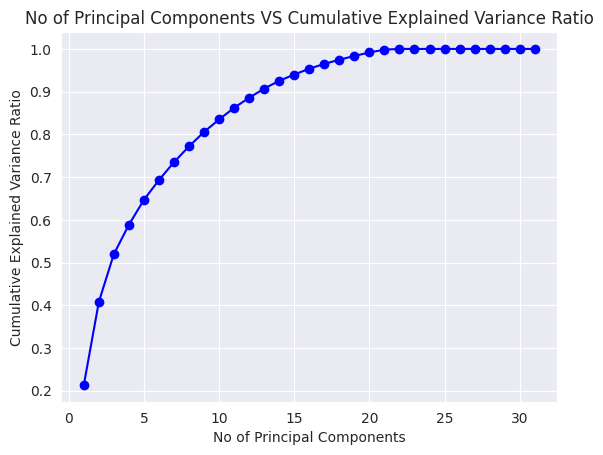

In [8]:
plt.plot(range(1, len(cevr) + 1), cevr, color = 'b', marker = 'o')
plt.title('No of Principal Components VS Cumulative Explained Variance Ratio')
plt.xlabel('No of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

**Note: From the above code it is evident that around half of the features can be removed since just retaining around 12 features preserves almost 90% of the variance.**

In [9]:
#Determining the exact no of features that capture 90% of the variance
X = df_combined.drop('Gleason_Score', axis = 1)
pca_1 = PCA(n_components = 0.9).fit(X)
print(f'No of components that capture 90% of the variance: {pca_1.n_components_}')

No of components that capture 90% of the variance: 13


Text(0, 0.5, 'Explained Variance')

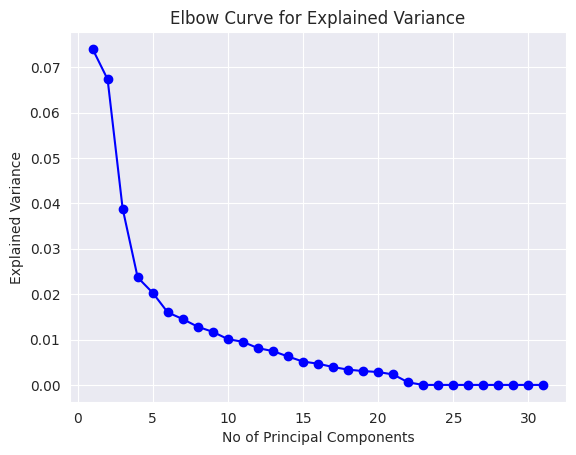

In [10]:
#Checking the elbow curve for the pca explained variance for entire dataset
ev = pca.explained_variance_
plt.plot(range(1, len(ev) + 1), ev, marker = 'o', color = 'b')
plt.title('Elbow Curve for Explained Variance')
plt.xlabel('No of Principal Components')
plt.ylabel('Explained Variance')

**The elbow point for the curve is around the 5 principal component mark. However since, we want to preserve atleast 90% of the variance of the dataset. We will be going with 13 principal components**

In [11]:
pca_2 = PCA(n_components = 13)
X_pca = pca_2.fit_transform(X)

In [12]:
X_pca

array([[ 0.03915129,  0.25591064, -0.02462468, ..., -0.16029406,
         0.0226977 , -0.00068658],
       [-0.5633726 , -0.10213798, -0.05474524, ...,  0.02349427,
        -0.04247905,  0.01655767],
       [ 0.3919805 , -0.02780241, -0.01497065, ...,  0.03296212,
         0.01104759, -0.04374397],
       ...,
       [ 0.41940482,  0.15114141,  0.0469614 , ..., -0.01203577,
         0.00685298,  0.16842272],
       [ 0.02223373,  0.14428133,  0.12941417, ..., -0.01338233,
         0.11233086,  0.03091502],
       [-0.08598788,  0.40875558,  0.19965279, ...,  0.06390673,
         0.004993  ,  0.03752816]])

In [13]:
X_pca.shape

(290, 13)

In [14]:
y = df_combined['Gleason_Score']
y

0      1
1      1
2      0
3      0
4      1
      ..
285    0
286    0
287    1
288    0
289    0
Name: Gleason_Score, Length: 290, dtype: int64

# **Autoencoders**

In [15]:
#Vanilla Autocomplete autoencoder
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
input_dim = X_pca.shape[1]
encoding_dim = 5
en_input = Input(shape = (input_dim, ))
en_layer = Dense(encoding_dim, activation = 'relu')(en_input)
de_layer = Dense(input_dim, activation = 'sigmoid')(en_layer)
auto_encoder_model = Model(en_input, de_layer)
auto_encoder_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 13)                78        
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 148 (592.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-10-16 14:55:31.627957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 14:55:31.740539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-16 14:55:31.740719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [16]:
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam
auto_encoder_model.compile(loss = mean_squared_error, optimizer = Adam(learning_rate = 0.001))

**Callbacks for the autoencoder model**

In [17]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lrs = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.05, patience = 10, min_lr = 1e-4)
es = EarlyStopping(monitor = 'val_loss', patience = 10)

In [18]:
#Fitting the model on the pca transformed dataset
history_1 = auto_encoder_model.fit(X_pca, X_pca, validation_split = 0.2, callbacks = [lrs, es], epochs = 1000)

Epoch 1/1000


2024-10-16 14:55:35.888813: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-10-16 14:55:36.254675: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7ae614443790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-16 14:55:36.254691: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-10-16 14:55:36.258729: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-16 14:55:36.271097: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-10-16 14:55:36.324368: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 [==============================] - 1s 16ms/step - loss: 0.2697 - val_loss: 0.2738 - lr: 0.0010
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2669 - val_loss: 0.2708 - lr: 0.0010
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2640 - val_loss: 0.2677 - lr: 0.0010
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2610 - val_loss: 0.2644 - lr: 0.0010
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2578 - val_loss: 0.2610 - lr: 0.0010
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2544 - val_loss: 0.2575 - lr: 0.0010
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.2510 - val_loss: 0.2537 - lr: 0.0010
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2473 - val_loss: 0.2499 - lr: 0.0010
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.2434 - val_loss: 0.2458 - lr: 0.0010
Epoch 10/1000

In [19]:
X_latent = auto_encoder_model.predict(X_pca)

10/10 [==============================] - 0s 2ms/step


In [20]:
X_latent

array([[0.01893338, 0.17223285, 0.06807644, ..., 0.0095825 , 0.0090329 ,
        0.00890377],
       [0.00093191, 0.03666364, 0.01328427, ..., 0.0007506 , 0.00180683,
        0.00059028],
       [0.3868227 , 0.01950631, 0.03820753, ..., 0.00896966, 0.00716046,
        0.00775825],
       ...,
       [0.41121054, 0.05954427, 0.08266822, ..., 0.01597749, 0.00971078,
        0.01363079],
       [0.03752485, 0.11114152, 0.10522438, ..., 0.00830431, 0.00964018,
        0.00817283],
       [0.02251291, 0.53282464, 0.19898446, ..., 0.03661538, 0.02997578,
        0.02630852]], dtype=float32)

In [21]:
X_pca

array([[ 0.03915129,  0.25591064, -0.02462468, ..., -0.16029406,
         0.0226977 , -0.00068658],
       [-0.5633726 , -0.10213798, -0.05474524, ...,  0.02349427,
        -0.04247905,  0.01655767],
       [ 0.3919805 , -0.02780241, -0.01497065, ...,  0.03296212,
         0.01104759, -0.04374397],
       ...,
       [ 0.41940482,  0.15114141,  0.0469614 , ..., -0.01203577,
         0.00685298,  0.16842272],
       [ 0.02223373,  0.14428133,  0.12941417, ..., -0.01338233,
         0.11233086,  0.03091502],
       [-0.08598788,  0.40875558,  0.19965279, ...,  0.06390673,
         0.004993  ,  0.03752816]])

In [22]:
print(f'Reconstruction error for the autoencoder: {tf.reduce_mean(mean_squared_error(X_pca, X_latent), axis = -1)}')

Reconstruction error for the autoencoder: 0.018270738422870636


In [23]:
encoder_model = Model(en_input, en_layer)

In [24]:
encoder_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 5)                 70        
                                                                 
Total params: 70 (280.00 Byte)
Trainable params: 70 (280.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
X_reduced_latent = encoder_model.predict(X_pca)

10/10 [==============================] - 0s 1ms/step


In [26]:
X_reduced_latent

array([[1.1242206 , 0.26565158, 1.1441365 , 0.8676859 , 0.59331787],
       [1.1745808 , 1.222721  , 1.7721248 , 1.8586228 , 0.23361135],
       [0.9614782 , 1.3377264 , 0.2931862 , 0.23041046, 1.6523793 ],
       ...,
       [1.1956186 , 0.908277  , 0.        , 0.27297217, 1.6069093 ],
       [1.0943798 , 0.54879546, 0.60581005, 1.0697554 , 0.8830044 ],
       [1.2528572 , 0.04445052, 0.41469407, 1.074172  , 0.06554085]],
      dtype=float32)

In [27]:
#Saving the 5 latent features as a separate csv_file for testing purposes
pd.DataFrame(X_reduced_latent).to_csv('5_Latent_Space_X_Features.csv')

# **Train-Val-Test split**

In [28]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X_reduced_latent, y, test_size = 0.3, random_state = 42)

In [29]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.3, random_state = 42)

# **Using this for a demo classification**

In [30]:
# ANN binary classifier
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
input_layer = Input(shape = (X_reduced_latent.shape[1]))
fc_1 = Dense(128, activation = 'relu')(input_layer)
dp_1 = Dropout(0.5)(fc_1)
bn_1 = BatchNormalization(momentum = 0.8)(dp_1)
fc_2 = Dense(256, activation = 'relu')(dp_1)
dp_2 = Dropout(0.2)(fc_2)
bn_2 = BatchNormalization(momentum = 0.8)(dp_2)
classifier_layer = Dense(1, activation = 'sigmoid')(bn_2)
ann_classifier_model = Model(input_layer, classifier_layer)

In [31]:
from tensorflow.keras.losses import BinaryCrossentropy
ann_classifier_model.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate= 0.001), metrics = ['accuracy'])

In [32]:
X_train.shape

(203, 5)

In [33]:
ann_classifier_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_2 (Dense)             (None, 128)               768       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                           

In [34]:
X_val.shape

(27, 5)

In [35]:
X_test.shape

(60, 5)

In [38]:
#Saving the train, test and validation sets as csv files for testing purposes
pd.DataFrame(X_train).to_csv('5_latent_X_train.csv')
pd.DataFrame(X_test).to_csv('5_latent_X_test.csv')
pd.DataFrame(X_val).to_csv('5_latent_X_val.csv')
pd.DataFrame(y_train).to_csv('5_latent_y_train.csv')
pd.DataFrame(y_test).to_csv('5_latent_y_test.csv')
pd.DataFrame(y_val).to_csv('5_latent_y_val.csv')

In [36]:
history_ann = ann_classifier_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, callbacks = [lrs, es])

Epoch 1/100
7/7 [==============================] - 2s 17ms/step - loss: 0.9192 - accuracy: 0.4778 - val_loss: 0.6506 - val_accuracy: 0.5926 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8113 - accuracy: 0.4877 - val_loss: 0.6160 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8267 - accuracy: 0.5123 - val_loss: 0.5801 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7421 - accuracy: 0.5616 - val_loss: 0.5515 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6988 - accuracy: 0.5911 - val_loss: 0.5431 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7802 - accuracy: 0.5271 - val_loss: 0.5374 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7561 - accurac

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
lr.fit(X_train, y_train)

LogisticRegression()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        14
           1       0.65      0.85      0.73        13

    accuracy                           0.70        27
   macro avg       0.72      0.71      0.70        27
weighted avg       0.73      0.70      0.70        27



In [40]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
print(classification_report(y_val, dec.predict(X_val)))

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        14
           1       0.56      0.77      0.65        13

    accuracy                           0.59        27
   macro avg       0.61      0.60      0.58        27
weighted avg       0.61      0.59      0.58        27



**Hyperparameter Tuning for Logistic Regression**

In [42]:
from sklearn.model_selection import GridSearchCV
lr_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
lr_1 = LogisticRegression()
gscv = GridSearchCV(param_grid = lr_param_grid, estimator = lr_1, cv = 5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [43]:
print(f'Best params for Logistic Regression: {gscv.best_params_}')

Best params for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [44]:
lr_1 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'saga')
lr_1.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='saga')

In [45]:
print(classification_report(y_val, lr_1.predict(X_val)))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64        14
           1       0.63      0.92      0.75        13

    accuracy                           0.70        27
   macro avg       0.75      0.71      0.69        27
weighted avg       0.76      0.70      0.69        27



# **Directly using Autoencoders without dimensionality reduction using PCA**

In [46]:
X

,GE_FOXA1,GE_CTNNB1,GE_NKX3-1,GE_ATM,GE_SPOP,GE_ZMYM3,GE_BRAF,CNA_FOXA1,CNA_CTNNB1,CNA_PTEN,...,DM_BRAF,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1
0,0.602396,0.875180,0.652366,0.725424,0.485713,0.650304,0.398619,0.351251,0.540445,0.683951,...,0.248904,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448
1,0.555186,0.384184,0.706125,0.374939,0.384733,0.527966,0.231899,0.373873,0.699505,0.410377,...,0.136454,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448
2,0.617020,0.792797,0.481580,0.664329,0.501783,0.696835,0.373817,0.360982,0.523447,0.553580,...,0.182826,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448
3,0.478407,0.786356,0.568205,0.838920,0.610479,0.889998,0.498159,0.356812,0.516999,0.644938,...,0.192746,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448
4,0.377998,0.824718,0.504132,0.611074,0.470017,0.428205,0.292625,0.356812,0.519343,0.635062,...,0.319159,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.100142,0.781156,0.000000,1.000000,0.346003,0.687155,0.230994,0.356812,0.519343,0.637037,...,0.442787,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448
286,0.624984,0.860459,0.753073,0.688023,0.427905,0.716040,0.389102,0.356812,0.517585,0.639506,...,0.398802,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448
287,0.642609,0.878522,0.668838,0.722636,0.461165,0.703648,0.466096,0.332607,0.467498,0.612923,...,0.145212,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448
288,0.535638,0.851672,0.606659,0.667384,0.350445,0.699619,0.382227,0.357739,0.519930,0.644444,...,0.170628,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448


In [47]:
y

0      1
1      1
2      0
3      0
4      1
      ..
285    0
286    0
287    1
288    0
289    0
Name: Gleason_Score, Length: 290, dtype: int64

In [48]:
#Deep Autoencoder neural network
input_dim = X.shape[1]
encoding_dim = 13
en_input = Input(shape = (input_dim, ))
en_fc_1 = Dense(64, activation = 'relu')(en_input)
en_fc_2 = Dense(32, activation = 'relu')(en_fc_1)
encoder_layer = Dense(encoding_dim, activation = 'relu')(en_fc_2)
dc_fc_1 = Dense(32, activation = 'relu')(encoder_layer)
dc_fc_2 = Dense(64, activation = 'relu')(dc_fc_1)
decoder_layer = Dense(input_dim, activation = 'sigmoid')(dc_fc_2)
ae_model = Model(en_input, decoder_layer)
ae_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 31)]              0         
                                                                 
 dense_5 (Dense)             (None, 64)                2048      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 13)                429       
                                                                 
 dense_8 (Dense)             (None, 32)                448       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 31)                2015

In [49]:
ae_model.compile(loss = mean_squared_error, optimizer = Adam(learning_rate = 0.001))

In [50]:
history_ae = ae_model.fit(X, X, epochs = 1000, validation_split = 0.2, callbacks = [lrs, es])

Epoch 1/1000
8/8 [==============================] - 1s 15ms/step - loss: 0.1126 - val_loss: 0.1086 - lr: 0.0010
Epoch 2/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.1023 - val_loss: 0.0925 - lr: 0.0010
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0811 - val_loss: 0.0641 - lr: 0.0010
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0501 - val_loss: 0.0349 - lr: 0.0010
Epoch 5/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0266 - val_loss: 0.0230 - lr: 0.0010
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0182 - val_loss: 0.0178 - lr: 0.0010
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0140 - val_loss: 0.0150 - lr: 0.0010
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 0.0122 - val_loss: 0.0139 - lr: 0.0010
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0135 - lr: 0.0010


**Getting the latent space extraction from the encoder network**

In [51]:
e_model = Model(en_input, encoder_layer)

In [52]:
X_latent_rep = e_model.predict(X)

10/10 [==============================] - 0s 1ms/step


In [53]:
X_latent_rep

array([[3.0996327, 2.1050708, 4.861546 , ..., 4.9278517, 3.389273 ,
        0.       ],
       [4.39453  , 1.491024 , 4.633244 , ..., 3.526757 , 2.9620628,
        0.       ],
       [2.846981 , 1.4760243, 4.5338335, ..., 3.8570526, 2.5805912,
        0.       ],
       ...,
       [2.6475654, 1.5444065, 4.800531 , ..., 4.2151246, 2.9763248,
        0.       ],
       [3.4856834, 1.3742073, 5.253157 , ..., 4.2817254, 3.5131304,
        0.       ],
       [3.789487 , 1.6757149, 5.68583  , ..., 5.1461673, 4.2301707,
        0.       ]], dtype=float32)

In [55]:
pd.DataFrame(X_latent_rep).to_csv('13_latent_X.csv')
pd.DataFrame(y).to_csv('Gleason_Scores.csv')

**Now using this 13 feature representation, split the dataset and perform binary classification**

In [53]:
X_train ,X_test, y_train, y_test = train_test_split(X_latent_rep, y, test_size = 0.3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.3, random_state = 42)

In [54]:
X_train.shape, X_val.shape, X_test.shape

((203, 13), (27, 13), (60, 13))

**Logistic Regression**

In [55]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [56]:
print(classification_report(y_val, lr.predict(X_val)))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55        14
           1       0.58      0.85      0.69        13

    accuracy                           0.63        27
   macro avg       0.66      0.64      0.62        27
weighted avg       0.67      0.63      0.61        27



In [57]:
#ANN Based binary classifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization
ann_classifier_tryhard = Sequential([Dense(32, activation = 'relu'),
                                     Dropout(0.1),
                                     Dense(32, activation = 'relu'),
                                     BatchNormalization(momentum = 0.8),
                                     Dense(64, activation = 'relu'),
                                     Dropout(0.1),
                                     Dense(128, activation = 'relu'),
                                     BatchNormalization(momentum = 0.8),
                                     Dense(1, activation = 'sigmoid')
                                     ])
ann_classifier_tryhard.compile(loss = BinaryCrossentropy(), optimizer = Adam(learning_rate = 0.0001), metrics = ['accuracy'])

In [58]:
history_tryhard = ann_classifier_tryhard.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, callbacks = [lrs, es])

Epoch 1/100
7/7 [==============================] - 1s 17ms/step - loss: 0.8801 - accuracy: 0.4581 - val_loss: 0.7017 - val_accuracy: 0.4074 - lr: 1.0000e-04
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7436 - accuracy: 0.5419 - val_loss: 0.7100 - val_accuracy: 0.5185 - lr: 1.0000e-04
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.7434 - accuracy: 0.5616 - val_loss: 0.7172 - val_accuracy: 0.5556 - lr: 1.0000e-04
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7668 - accuracy: 0.5172 - val_loss: 0.7156 - val_accuracy: 0.4815 - lr: 1.0000e-04
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.7160 - accuracy: 0.6059 - val_loss: 0.7163 - val_accuracy: 0.5185 - lr: 1.0000e-04
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7915 - accuracy: 0.5813 - val_loss: 0.7119 - val_accuracy: 0.4444 - lr: 1.0000e-04
Epoch 7/100
7/7 [==============================] - 0s 5ms/step 